In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
import time
from numba import njit
from scipy.optimize import curve_fit

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [29]:
LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

gmt_awk_LS133 = OpenRootFile(LS133, gmt_features)
gmt_awk_LS263 = OpenRootFile(LS263, gmt_features)
gmt_awk_LS264 = OpenRootFile(LS264, gmt_features)
gmt_awk_LS306 = OpenRootFile(LS306, gmt_features)

bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

# Molteplicità di Stub per GMT

In [3]:
#Caricamenot BX delle stubs
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento muoni di GMT
nGmtMuons_LS133 = gmt_awk_LS133.nGmtMuons
nGmtMuons_LS263 = gmt_awk_LS263.nGmtMuons
nGmtMuons_LS264 = gmt_awk_LS264.nGmtMuons
nGmtMuons_LS306 = gmt_awk_LS306.nGmtMuons

nBmtfMuons_LS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuons_LS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuons_LS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuons_LS306 = bmtf_awk_LS306.nBmtfMuons

In [4]:
#GMT
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_gmt_counts_LS133 = np.bincount(BX_LS133, weights=nGmtMuons_LS133)
bx_gmt_counts_LS263 = np.bincount(BX_LS263, weights=nGmtMuons_LS263)
bx_gmt_counts_LS264 = np.bincount(BX_LS264, weights=nGmtMuons_LS264)
bx_gmt_counts_LS306 = np.bincount(BX_LS306, weights=nGmtMuons_LS306)

bx_gmt_counts = (bx_gmt_counts_LS133 + bx_gmt_counts_LS263 + bx_gmt_counts_LS264 + bx_gmt_counts_LS306)/4


#BMTF
bx_bmtf_counts_LS133 = np.bincount(BX_LS133, weights=nBmtfMuons_LS133)
bx_bmtf_counts_LS263 = np.bincount(BX_LS263, weights=nBmtfMuons_LS263)
bx_bmtf_counts_LS264 = np.bincount(BX_LS264, weights=nBmtfMuons_LS264)
bx_bmtf_counts_LS306 = np.bincount(BX_LS306, weights=nBmtfMuons_LS306)

bx_bmtf_counts = (bx_bmtf_counts_LS133 + bx_bmtf_counts_LS263 + bx_bmtf_counts_LS264 + bx_bmtf_counts_LS306)/4

print(bx_bmtf_counts_LS133[71])

239.0


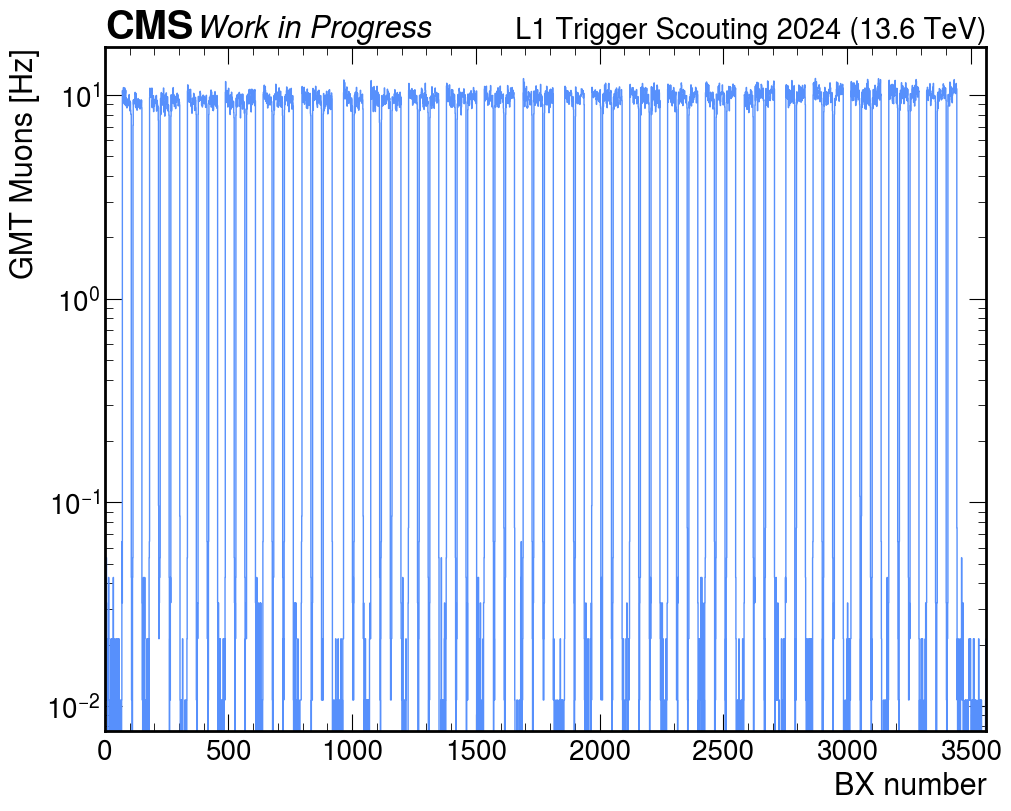

In [5]:
#Plot con i quattro file uniti
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_gmt_counts), histtype='step')
#ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('GMT Muons [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')

plt.savefig("../Immagini/GMT.pdf")
plt.savefig("../Immagini/ImmaginiPNG/GMT.png")

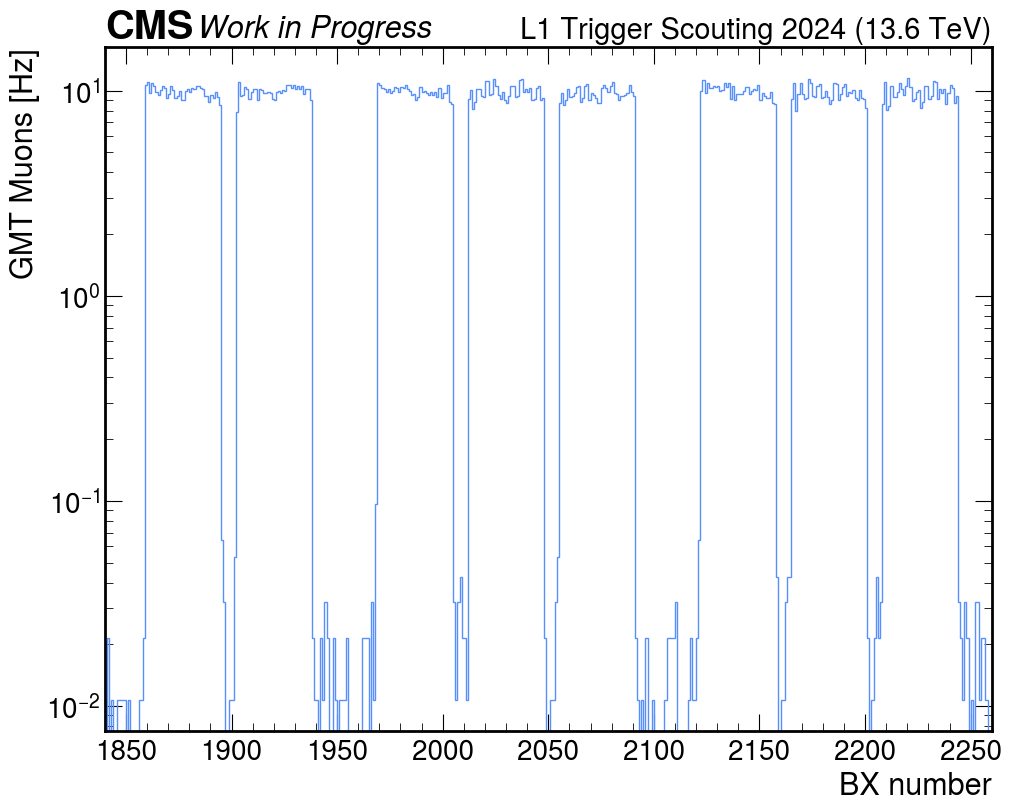

In [6]:
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_gmt_counts[bx_left:bx_right]), histtype='step')
#ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_bmtf_counts[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('GMT Muons [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_yscale('log')



In [7]:
nGmtLS133_count = ConvertToHz(np.bincount(nGmtMuons_LS133))
nGmtLS263_count = ConvertToHz(np.bincount(nGmtMuons_LS263))
nGmtLS264_count = ConvertToHz(np.bincount(nGmtMuons_LS264))
nGmtLS306_count = ConvertToHz(np.bincount(nGmtMuons_LS306))

nGmt_Array = ak.Array([nGmtLS133_count, nGmtLS263_count, nGmtLS264_count, nGmtLS306_count])

MaxStubs = max(len(nGmt_Array[0]), len(nGmt_Array[1]), len(nGmt_Array[2]), len(nGmt_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnGmtLS133 = ak.fill_none(ak.pad_none(nGmt_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS263 = ak.fill_none(ak.pad_none(nGmt_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS264 = ak.fill_none(ak.pad_none(nGmt_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS306 = ak.fill_none(ak.pad_none(nGmt_Array[3], MaxStubs, axis = 0, clip=True), 0)

nGmt = FnGmtLS133 + FnGmtLS263 + FnGmtLS264 + FnGmtLS306


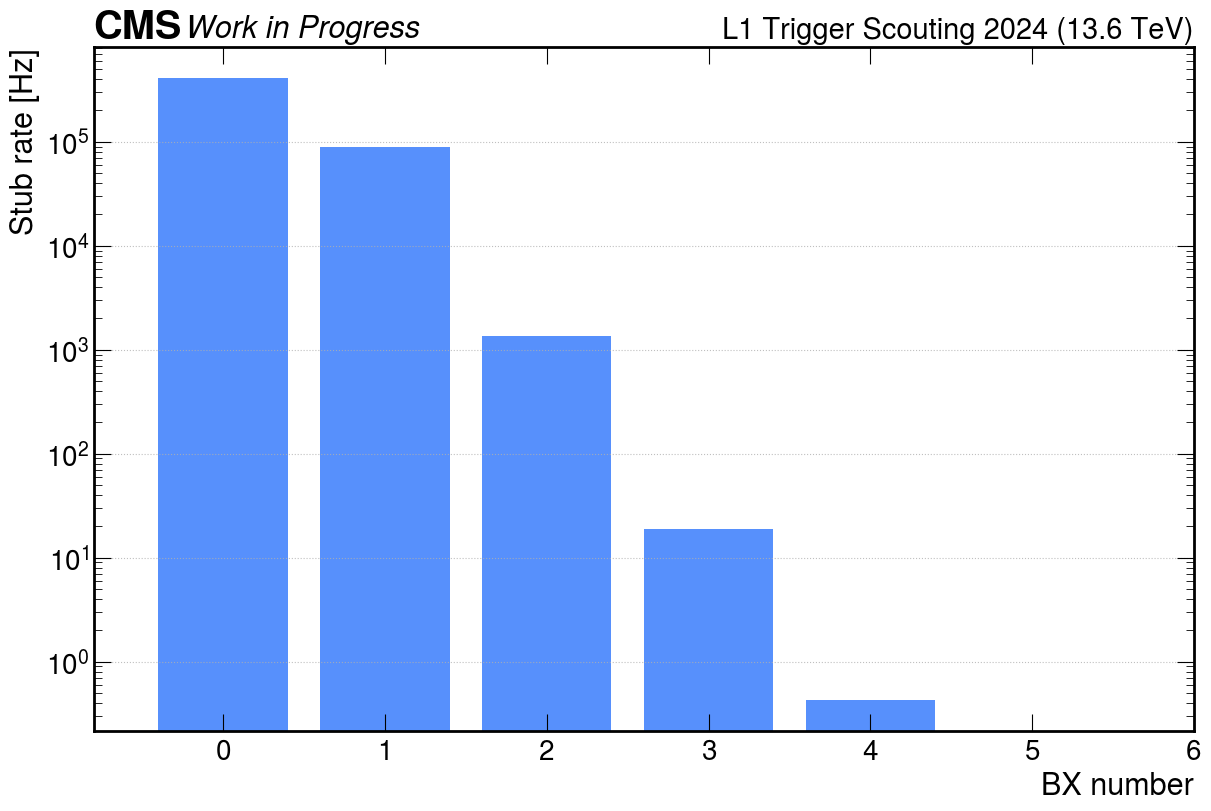

In [8]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nGmt[:])), nGmt[:])

#ax.set_xticks(ticks=np.arange(9), labels=np.arange(1, 10, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(-0.8, 6)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

# $\Delta R$



In [9]:
#Permette di trovare gli indici dei muoni BMTF e GMT in ogni bin del BX 
def BX_OPT(BX, nMuons):

    BX_counts_max = int(np.max(np.bincount(BX, weights=nMuons)))
    BX_Matrix = np.zeros((ONE_ORBIT_IN_BX, BX_counts_max), dtype=int)
    Temp = np.zeros(ONE_ORBIT_IN_BX, dtype=int)
    
    for j in range(len(BX)):
        BX_Val = BX[j]
        if nMuons[j] > 0:
            BX_Matrix[BX_Val, Temp[BX_Val]:Temp[BX_Val] + nMuons[j]] = np.arange(j, j + nMuons[j])
            Temp[BX_Val] += nMuons[j]

    BX_Matrix = ak.Array(BX_Matrix)

    return  ak.drop_none(ak.mask(BX_Matrix, BX_Matrix != 0))
    

In [10]:
BX_BMTF_LS133 = BX_OPT(BX_LS133, nBmtfMuons_LS133)
BX_GMT_LS133 = BX_OPT(BX_LS133, nGmtMuons_LS133)

In [11]:
print(len(BX_BMTF_LS133[71]))

239


In [12]:
'''ak.to_parquet(BX_BMTF_LS133, 'BX_BMTFTEST.parquet')
ak.to_parquet(BX_GMT_LS133, 'BX_GMTTEST.parquet')'''

"ak.to_parquet(BX_BMTF_LS133, 'BX_BMTFTEST.parquet')\nak.to_parquet(BX_GMT_LS133, 'BX_GMTTEST.parquet')"

In [13]:
#Carico dati per GMT
GmtPhi_LS133 = gmt_awk_LS133.gmtPhi
GmtPhi_LS263 = np.array(ak.flatten(gmt_awk_LS263.gmtPhi))
GmtPhi_LS264 = np.array(ak.flatten(gmt_awk_LS264.gmtPhi))
GmtPhi_LS306 = np.array(ak.flatten(gmt_awk_LS306.gmtPhi))

GmtEta_LS133 = gmt_awk_LS133.gmtEta
GmtEta_LS263 = np.array(ak.flatten(gmt_awk_LS263.gmtEta))
GmtEta_LS264 = np.array(ak.flatten(gmt_awk_LS264.gmtEta))
GmtEta_LS306 = np.array(ak.flatten(gmt_awk_LS306.gmtEta))

#Carico dati per BMTF

BmtfEta_LS133 = bmtf_awk_LS133.bmtfEta
BmtfEta_LS263 = np.array(ak.flatten(bmtf_awk_LS263.bmtfEta))
BmtfEta_LS264 = np.array(ak.flatten(bmtf_awk_LS264.bmtfEta))
BmtfEta_LS306 = np.array(ak.flatten(bmtf_awk_LS306.bmtfEta))

BmtfPhi_LS133 = bmtf_awk_LS133.bmtfPhi
BmtfPhi_LS263 = np.array(ak.flatten(bmtf_awk_LS263.bmtfPhi))
BmtfPhi_LS264 = np.array(ak.flatten(bmtf_awk_LS264.bmtfPhi))
BmtfPhi_LS306 = np.array(ak.flatten(bmtf_awk_LS306.bmtfPhi))


#Trova tutti gli elementi nulli dell'array di array e li sostituisce con degli zero. Poi viene flattato
GmtEta_LS133 = ak.flatten(ak.where(ak.num(GmtEta_LS133) == 0, ak.Array([[0]]), GmtEta_LS133))
GmtPhi_LS133 = ak.flatten(ak.where(ak.num(GmtPhi_LS133) == 0, ak.Array([[0]]), GmtPhi_LS133))
BmtfEta_LS133 = ak.flatten(ak.where(ak.num(BmtfEta_LS133) == 0, ak.Array([[0]]), BmtfEta_LS133))
BmtfPhi_LS133 = ak.flatten(ak.where(ak.num(BmtfPhi_LS133) == 0, ak.Array([[0]]), BmtfPhi_LS133))



Usiamo il primo metodo, ovvero cerchiamo la discrepanza tra candidati muoni del BMTF e muoni del GMT

In [36]:
def Delta(BMTF, GMT):
  return BMTF - GMT

def DeltaR(BmtfPhi, GmtPhi, BmtfEta, GmtEta):

  return np.sqrt((BmtfPhi - GmtPhi)**2 + (BmtfEta - GmtEta))


def DeltaRDistribution(BX_BMTF, BX_GMT, BmtfPhi, GmtPhi, BmtfEta, GmtEta):

  DeltaDist = np.zeros(len(ak.flatten(BX_BMTF)), dtype=float)
  IndexMin = np.zeros(len(ak.flatten(BX_BMTF)), dtype=int)

  for i in range(200):
    for j in range(len(BX_BMTF[i])):
      DeltaRTemp = DeltaR(BmtfPhi[BX_BMTF[i][j]], GmtPhi[BX_GMT[i][:]], BmtfEta[BX_BMTF[i][j]], GmtEta[BX_GMT[i][:]])    #DelraR > 0.4 == 3.5% 
      #DeltaRTemp = DeltaR(BmtfPhi[BX_BMTF[i][:]], GmtPhi[BX_GMT[i][j]], BmtfEta[BX_BMTF[i][:]], GmtEta[BX_GMT[i][j]])     #DeltaR > 0.4 == 0.03%

      minDeltaR = np.min(DeltaRTemp)
      indexTemp = np.argmin(DeltaRTemp)

      DeltaDist[i] = minDeltaR
      IndexMin[i] = indexTemp
    

  return DeltaDist, IndexMin

In [37]:
RDist, Index = DeltaRDistribution(BX_BMTF_LS133, BX_GMT_LS133, BmtfPhi_LS133, GmtPhi_LS133, BmtfEta_LS133, GmtEta_LS133)

In [26]:
RDist

533064


In [40]:
i = 74
j = 14

def DeltaR(BmtfPhi, GmtPhi, BmtfEta, GmtEta):
  return np.sqrt((BmtfPhi - GmtPhi)**2 + (BmtfEta - GmtEta)**2 )

RTEST1 = DeltaR(BmtfPhi_LS133[BX_BMTF_LS133[i][j]], GmtPhi_LS133[BX_GMT_LS133[i][:]], BmtfEta_LS133[BX_BMTF_LS133[i][j]], GmtEta_LS133[BX_GMT_LS133[i][:]])
RTEST2 = DeltaR(BmtfPhi_LS133[BX_BMTF_LS133[i][:]], GmtPhi_LS133[BX_GMT_LS133[i][j]], BmtfEta_LS133[BX_BMTF_LS133[i][:]], GmtEta_LS133[BX_GMT_LS133[i][j]])


print(len((bx_bmtf_counts_LS133)))
print(bx_bmtf_counts_LS133[i], " ", bx_gmt_counts_LS133[i])
print(BX_BMTF_LS133[i][j], " ", len(BX_BMTF_LS133[i]), " ", BmtfPhi_LS133[BX_BMTF_LS133[i][j]])
print(len(RTEST1), " ", len(RTEST2))

print(np.min(RTEST1), " ", np.min(RTEST2))

3565
274.0   262.0
183604   274   2.6616270542144775
262   274
0.17727989098773256   0.0


In [19]:
#DeltaRAccettable = [x for x in RDist if x < 0.4]

In [20]:
#print(len(DeltaRAccettable))

## Phi ed Eta GMT

In [21]:
#-----------------------------------------------GMT-----------------------------------------------
GmtQualLS133 = ak.flatten(gmt_awk_LS133.gmtQual)
GmtQualLS263 = ak.flatten(gmt_awk_LS263.gmtQual)
GmtQualLS264 = ak.flatten(gmt_awk_LS264.gmtQual)
GmtQualLS306 = ak.flatten(gmt_awk_LS306.gmtQual)

GmtEtaLS133 = ak.flatten(gmt_awk_LS133.gmtEta)
GmtEtaLS263 = ak.flatten(gmt_awk_LS263.gmtEta)
GmtEtaLS264 = ak.flatten(gmt_awk_LS264.gmtEta)
GmtEtaLS306 = ak.flatten(gmt_awk_LS306.gmtEta)

GmtPhiLS133 = ak.flatten(gmt_awk_LS133.gmtPhi)
GmtPhiLS263 = ak.flatten(gmt_awk_LS263.gmtPhi)
GmtPhiLS264 = ak.flatten(gmt_awk_LS264.gmtPhi)
GmtPhiLS306 = ak.flatten(gmt_awk_LS306.gmtPhi)

GmtQual = ak.concatenate([GmtQualLS133, GmtQualLS263, GmtQualLS264, GmtQualLS306])
GmtPhi = ak.concatenate([GmtPhiLS133, GmtPhiLS263, GmtPhiLS264, GmtPhiLS306])
GmtEta = np.array(ak.concatenate([GmtEtaLS133, GmtEtaLS263, GmtEtaLS264, GmtEtaLS306]))

#-----------------------------------------------BMTF-----------------------------------------------

BmtfHwQualLS133 = ak.flatten(bmtf_awk_LS133.bmtfHwQual)
BmtfHwQualLS263 = ak.flatten(bmtf_awk_LS263.bmtfHwQual)
BmtfHwQualLS264 = ak.flatten(bmtf_awk_LS264.bmtfHwQual)
BmtfHwQualLS306 = ak.flatten(bmtf_awk_LS306.bmtfHwQual)

BmtfEtaLS133 = ak.flatten(bmtf_awk_LS133.bmtfEta)
BmtfEtaLS263 = ak.flatten(bmtf_awk_LS263.bmtfEta)
BmtfEtaLS264 = ak.flatten(bmtf_awk_LS264.bmtfEta)
BmtfEtaLS306 = ak.flatten(bmtf_awk_LS306.bmtfEta)

BmtfPhiLS133 = ak.flatten(bmtf_awk_LS133.bmtfPhi)
BmtfPhiLS263 = ak.flatten(bmtf_awk_LS263.bmtfPhi)
BmtfPhiLS264 = ak.flatten(bmtf_awk_LS264.bmtfPhi)
BmtfPhiLS306 = ak.flatten(bmtf_awk_LS306.bmtfPhi)

BmtfPhi = ak.concatenate([BmtfPhiLS133, BmtfPhiLS263, BmtfPhiLS264, BmtfPhiLS306])
BmtfEta = ak.concatenate([BmtfEtaLS133, BmtfEtaLS263, BmtfEtaLS264, BmtfEtaLS306])
BmtfWeights = np.array(ak.concatenate([BmtfHwQualLS133, BmtfHwQualLS263, BmtfHwQualLS264, BmtfHwQualLS306]))

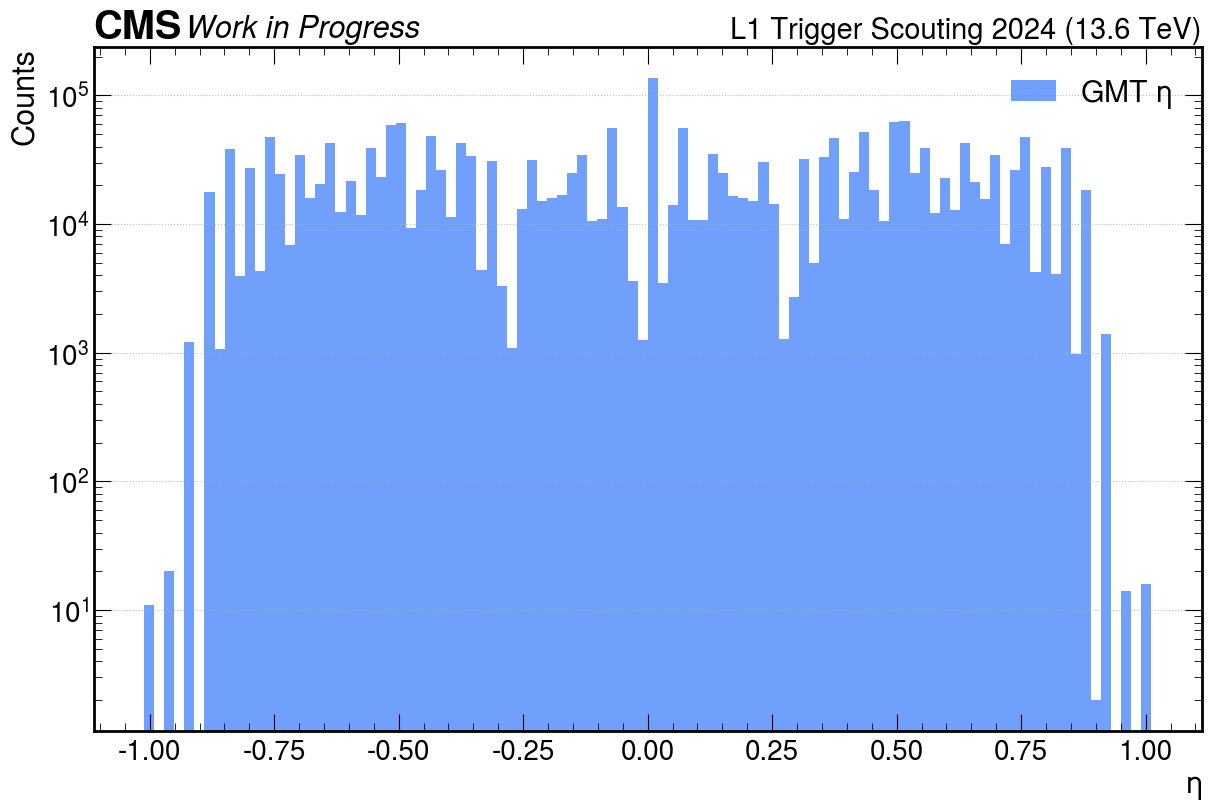

In [22]:
#Plot Eta 
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(GmtEta, bins = 100, alpha = 0.85, label=r'GMT $\eta$')
#ax.hist(BmtfEta, bins = 100, alpha = 0.85, label='BMTF $\eta$')

ax.set_xlabel(r'$\eta$')
ax.set_ylabel('Counts')
ax.legend()

ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.show()

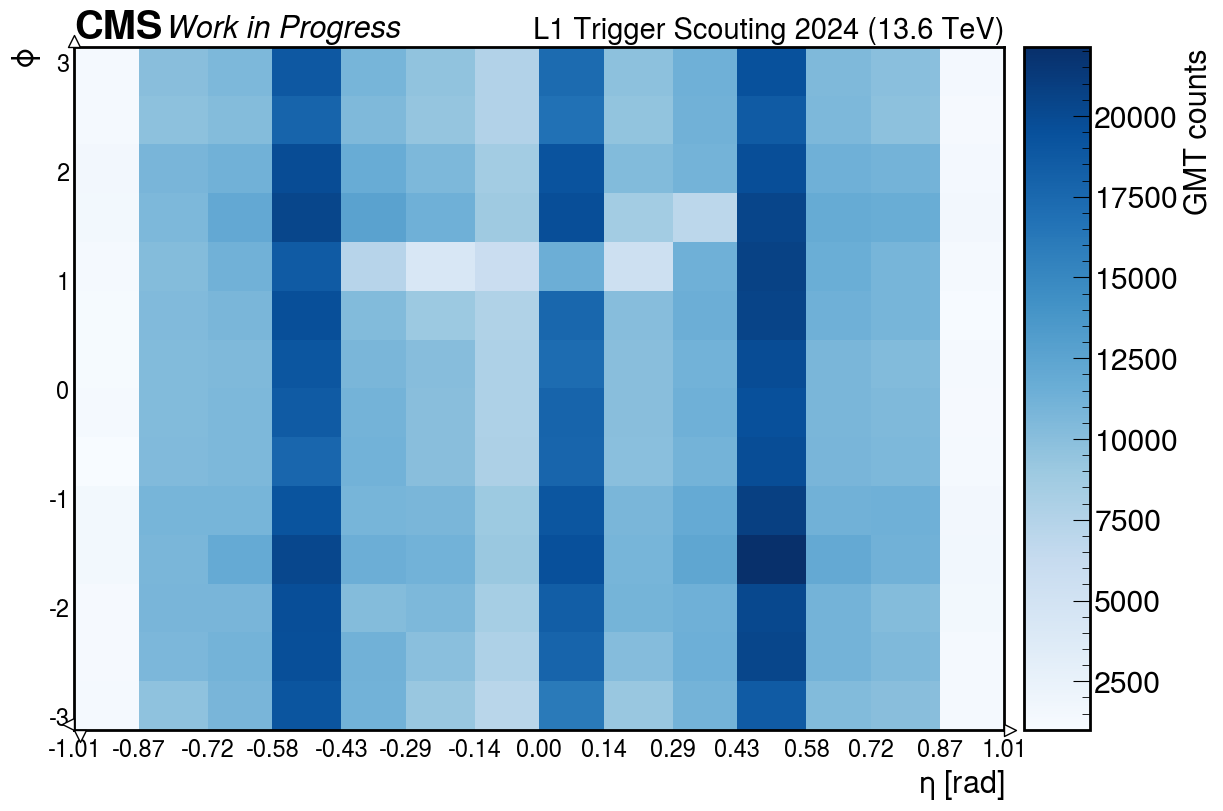

In [23]:
#Grafico bidimensionale per i GMT

BinPhi = 15
BinEta = 15


PhiRange, PhiIndicies = Bins(ak.min(BmtfPhi), ak.max(BmtfPhi), BinPhi, BmtfPhi)
EtaRange, EtaIndicies = Bins(ak.min(BmtfEta), ak.max(BmtfEta), BinEta, BmtfEta)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
    hist.axis.Variable(np.round(PhiRange, 2), name='Phi', label='Phi number'),
)
hist2d.fill(Phi=GmtPhi, Eta=GmtEta)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize=FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('GMT counts', fontsize=FONTSIZE)

ax.set_xlabel(r'$\eta$ [rad]')
ax.set_ylabel(r'$\phi$')

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)